In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from scipy.stats import skew,norm

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler

%matplotlib inline
pd.options.display.float_format = '{:.1f}'.format
from scipy import stats

import tensorflow as tf
from tensorflow import keras

In [2]:
def display(pandas):
    with pd.set_option('display.max_columns', None, 'display.max_rows', None):
        display(pandas)



### Read  Parcel Data

In [3]:
housing =  pd.read_csv("Parceldata.csv")
housing

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,19,30,54,55,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OID_,FID_Parcels,map_book,map_page,map_block,lot_num,nc_pin,condo_town_flag,parcel_type,pid,...,FID_HHincome,Total_Households,Median_Household_Income,TotalFamilies,FamiliesInPoverty,FamilyPovertyRate,ORIG_FID,POINT_X,POINT_Y,Divide
0,1,149,221,3,2,40,4438072484,0.0,0.0,22103240,...,-1,0.0,0.0,0.0,0.0,0.0,1,-80.9,35.1,Crescent
1,2,1960,229,37,2,95,4456981804,0.0,0.0,22937295,...,-1,0.0,0.0,0.0,0.0,0.0,2,-80.8,35.0,Wedge
2,3,12861,229,43,1,99,4456561498,0.0,0.0,22943199,...,-1,0.0,0.0,0.0,0.0,0.0,3,-80.8,35.0,Wedge
3,4,18653,217,25,1,15,3498832635,0.0,0.0,21725115,...,-1,0.0,0.0,0.0,0.0,0.0,4,-81.0,35.1,Wedge
4,5,18654,217,25,1,16,3498836911,0.0,0.0,21725116,...,-1,0.0,0.0,0.0,0.0,0.0,5,-81.0,35.1,Wedge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427777,427778,410475,43,25,C,99,4567107084,1.0,0.0,04325C99,...,419,290.0,31250.0,171.0,31.0,0.2,428333,-80.8,35.3,Crescent
427778,427779,410476,43,25,C,99,4567107084,1.0,0.0,04325C99,...,419,290.0,31250.0,171.0,31.0,0.2,428334,-80.8,35.3,Crescent
427779,427780,410477,43,25,C,99,4567107084,1.0,0.0,04325C99,...,419,290.0,31250.0,171.0,31.0,0.2,428335,-80.8,35.3,Crescent
427780,427781,410478,43,25,C,99,4567107084,1.0,0.0,04325C99,...,419,290.0,31250.0,171.0,31.0,0.2,428336,-80.8,35.3,Crescent


### Check parcel columns 

In [4]:
#housing.columns

### Check count of features for Crescent and Wedge 

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

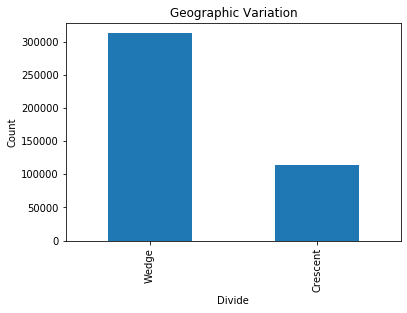

In [5]:
housing['Divide'].value_counts().plot(kind='bar')
plt.title('Geographic Variation')
plt.xlabel('Divide')
plt.ylabel('Count')
sns.despine

### Check number of null values in each of the variables 

In [6]:
# pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [7]:
Nullpercent = (housing.isnull().sum()/len(housing))*100
Nullpercent.sort_index()

Divide               0.0
FID_HHincome         0.0
FID_Parcels          0.0
FULL_ADDRESS         3.9
FamiliesInPoverty    0.0
                    ... 
typeofdeed           8.9
units               16.8
vacantorimproved     7.7
yearbuilt           14.2
zipcode              2.9
Length: 88, dtype: float64

#### Drop  variables that have null values over 30%

In [8]:
housing = housing.dropna(axis = 1, thresh = 0.70*len(housing))
#housing

### Create a column for the year 

In [9]:
housing = housing.assign(Age = 2020 - housing["yearbuilt"])
housing = housing.drop(columns = ["yearbuilt"] )
housing.head(2)

,OID_,FID_Parcels,map_book,map_page,map_block,lot_num,nc_pin,condo_town_flag,parcel_type,pid,...,Total_Households,Median_Household_Income,TotalFamilies,FamiliesInPoverty,FamilyPovertyRate,ORIG_FID,POINT_X,POINT_Y,Divide,Age
0,1,149,221,3,2,40,4438072484,0.0,0.0,22103240,...,0.0,0.0,0.0,0.0,0.0,1,-80.9,35.1,Crescent,42.0
1,2,1960,229,37,2,95,4456981804,0.0,0.0,22937295,...,0.0,0.0,0.0,0.0,0.0,2,-80.8,35.0,Wedge,nan


###  Drop unwanted columns 

In [10]:
housing = housing.drop(columns = ['FULL_ADDRESS','OID_', 'ORIG_FID','city','mailaddr1',
                'map_block','map_book','map_page','municipality','ownerlastname','ownerfirstname','ownertype','parcel_type',
                'pid','state','stdir','stname','stsuffix','sttype','taxfire', 'accounttype','descbuildingtype',
                'propertyusecode', 'netbldgvalue', 'extravaluefeature','landvalue','totalvalue',
                'lot_num','nc_pin','legal_from','commonpid','taxpid','houseno','cardno','deedbook','deedpage','legalreference',
                'neighbourhood','parlegaldesc','landsequenceno', 'FamilyPovertyRate', 'Total_Households', 'FamiliesInPoverty', 'FID_Parcels',
                'TotalFamilies','typeofdeed','taxmun','landusecode', 'physicaldepcode', 'ownerno','codemunicipality','zipcode',
                'vacantorimproved','foundation','extwall','ownerno','TotalFamilies','FID_HHincome','codemunicipality',
                'condo_town_flag','cdebuilding','actype', 'cdebuilding', 'aheatingtype', 'fireplaces' ])


In [11]:
housing.columns

Index(['totalac', 'dateofsale', 'price', 'heatedarea', 'storyheight',
       'heatedfuel', 'numfireplaces', 'bldggrade', 'fullbaths', 'halfbaths',
       'bedrooms', 'units', 'descpropertyuse', 'Median_Household_Income',
       'POINT_X', 'POINT_Y', 'Divide', 'Age'],
      dtype='object')

### Check statistics for each of the variable

In [12]:
housing.head(2)

,totalac,dateofsale,price,heatedarea,storyheight,heatedfuel,numfireplaces,bldggrade,fullbaths,halfbaths,bedrooms,units,descpropertyuse,Median_Household_Income,POINT_X,POINT_Y,Divide,Age
0,0.6,2/12/2007 0:00:00,11000.0,680.0,1 STORY,ELECTRIC,0.0,AVERAGE,0.0,2.0,0.0,0.0,Office,0.0,-80.9,35.1,Crescent,42.0
1,9.0,5/2/1996 0:00:00,0.0,nan,NaN,NaN,nan,NaN,nan,nan,nan,nan,NaN,0.0,-80.8,35.0,Wedge,nan


In [13]:
housing = housing.dropna()

In [14]:
housing.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
totalac,273677.0,3.4,229.1,0.0,0.0,0.0,0.2,44649.0
price,273677.0,262400.2,1640709.4,0.0,72000.0,159000.0,275000.0,455500000.0
heatedarea,273677.0,2801.8,11089.2,0.0,1388.0,1896.0,2684.0,1365840.0
numfireplaces,273677.0,0.8,2.1,0.0,1.0,1.0,1.0,320.0
fullbaths,273677.0,2.0,1.2,0.0,2.0,2.0,2.0,309.0
halfbaths,273677.0,0.6,1.2,0.0,0.0,1.0,1.0,308.0
bedrooms,273677.0,3.1,1.2,0.0,3.0,3.0,4.0,240.0
units,273677.0,1.4,9.4,0.0,1.0,1.0,1.0,694.0
Median_Household_Income,273677.0,80379.0,40351.3,0.0,50938.0,73563.0,101169.0,250000.0
POINT_X,273677.0,-80.8,0.1,-81.1,-80.9,-80.8,-80.8,-80.6


In [15]:
cleandata = (housing.isnull().sum()/len(housing))*100
#cleandata

### Review and convert categorical variables

In [16]:
#housing 

In [17]:
 housing.groupby("storyheight").size()

storyheight
                    24
1 STORY         107717
1.5 STORY        16244
2.0 STORY       130469
2.5 STORY         9267
3.0 STORY           66
>=4.0 STORY          4
A-FRAME             11
BI-LEVEL          1030
CAPE COD           140
RANCH W/BSMT      2239
SPLIT LEVEL       6466
dtype: int64

In [18]:
## Rename GOOD 06 as GOOD
housing.bldggrade[housing.bldggrade == "GOOD 06"] = "GOOD"

## Rename Blank story height as 1 STORY

housing.storyheight[housing.storyheight == " "] = "1 STORY"

#### Use Label Encoder to Convert Catetgorical variable to numeric

In [19]:
Labelencoder = LabelEncoder()

housing['Divide_transformed'] = Labelencoder.fit_transform(housing["Divide"])
housing['bldggrade_transformed'] = Labelencoder.fit_transform(housing["bldggrade"])
housing['heatedfuel_transformed'] = Labelencoder.fit_transform(housing["heatedfuel"])
housing['storyheight_transformed'] = Labelencoder.fit_transform(housing["storyheight"])
housing


,totalac,dateofsale,price,heatedarea,storyheight,heatedfuel,numfireplaces,bldggrade,fullbaths,halfbaths,...,descpropertyuse,Median_Household_Income,POINT_X,POINT_Y,Divide,Age,Divide_transformed,bldggrade_transformed,heatedfuel_transformed,storyheight_transformed
0,0.6,2/12/2007 0:00:00,11000.0,680.0,1 STORY,ELECTRIC,0.0,AVERAGE,0.0,2.0,...,Office,0.0,-80.9,35.1,Crescent,42.0,0,0,1,0
7,0.0,2/28/2017 0:00:00,215000.0,1998.0,SPLIT LEVEL,GAS,1.0,AVERAGE,3.0,0.0,...,Single-Family,0.0,-80.9,35.0,Wedge,26.0,1,0,2,10
13,0.3,2/4/2002 0:00:00,120000.0,1664.0,2.0 STORY,ELECTRIC,1.0,AVERAGE,2.0,1.0,...,Single-Family,0.0,-80.9,35.1,Wedge,33.0,1,0,1,2
14,0.2,8/1/2012 0:00:00,190000.0,2256.0,1 STORY,GAS,1.0,AVERAGE,2.0,0.0,...,Single-Family,0.0,-81.0,35.1,Crescent,8.0,0,0,2,0
18,4.4,5/17/2013 0:00:00,340000.0,2668.0,1 STORY,ELECTRIC,1.0,GOOD,2.0,1.0,...,Single-Family,0.0,-81.0,35.1,Wedge,17.0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427731,0.0,4/24/2020 0:00:00,108000.0,937.0,2.0 STORY,GAS,0.0,AVERAGE,2.0,1.0,...,Condo/Townhome,31250.0,-80.8,35.3,Crescent,19.0,0,0,2,2
427732,0.0,3/13/2014 0:00:00,52500.0,930.0,2.0 STORY,GAS,0.0,AVERAGE,2.0,1.0,...,Condo/Townhome,31250.0,-80.8,35.3,Crescent,19.0,0,0,2,2
427733,0.0,1/19/2017 0:00:00,70000.0,945.0,2.0 STORY,GAS,0.0,AVERAGE,2.0,1.0,...,Condo/Townhome,31250.0,-80.8,35.3,Crescent,19.0,0,0,2,2
427734,0.0,4/4/2002 0:00:00,92500.0,930.0,2.0 STORY,GAS,0.0,AVERAGE,2.0,1.0,...,Condo/Townhome,31250.0,-80.8,35.3,Crescent,19.0,0,0,2,2


In [20]:
# ## Covert divide to 1 and 0, Crescent = 1, Wedge = 0
# housing.Divide[housing.Divide == "Crescent"] = 1
# housing.Divide[housing.Divide == "Wedge"] = 0

# ###Convert building grade 
# housing.bldggrade[housing.bldggrade == "AVERAGE"] = 1
# housing.bldggrade[housing.bldggrade == "CUSTOM"] = 2
# housing.bldggrade[housing.bldggrade == "EXCELLENT"] = 3
# housing.bldggrade[housing.bldggrade == "FAIR"] = 4
# housing.bldggrade[housing.bldggrade == "GOOD"] = 5
# housing.bldggrade[housing.bldggrade == "GOOD 06"] = 5
# housing.bldggrade[housing.bldggrade == "MINIMUM"] = 6
# housing.bldggrade[housing.bldggrade == "VERY GOOD"] = 7

# ##convert heated fuel
# housing.heatedfuel[housing.heatedfuel == "ELECTRIC"] = 1
# housing.heatedfuel[housing.heatedfuel == "GAS"] = 2 
# housing.heatedfuel[housing.heatedfuel == "NONE"] = 3
# housing.heatedfuel[housing.heatedfuel == " "] = 3
# housing.heatedfuel[housing.heatedfuel == "OIL/WD/COAL"] = 4
# housing.heatedfuel[housing.heatedfuel == "SOLAR/GEOTHRM"] = 5

In [21]:
 housing.groupby("descpropertyuse").size()

descpropertyuse
                      29
Commercial          2029
Condo/Townhome     38611
Govt-Inst            884
Hotel/Motel          182
Manufactured         970
Multi-Family         886
Office              2824
Single-Family     224207
StadiumArena           3
Warehouse           3042
Warehouse Lg          10
dtype: int64

### We are only interested in single family, Multi family, Condos, and Townhomes

In [22]:
### Filter Single Family, Multi Family and Condos 

singlefamily = housing[housing["descpropertyuse"] == "Single-Family"] 
multifamily = housing[housing["descpropertyuse"] == "Multi-Family"] 
Condo = housing[housing["descpropertyuse"] == "Condo/Townhome"] 

housing = pd.concat([singlefamily,multifamily,Condo], axis = 0)

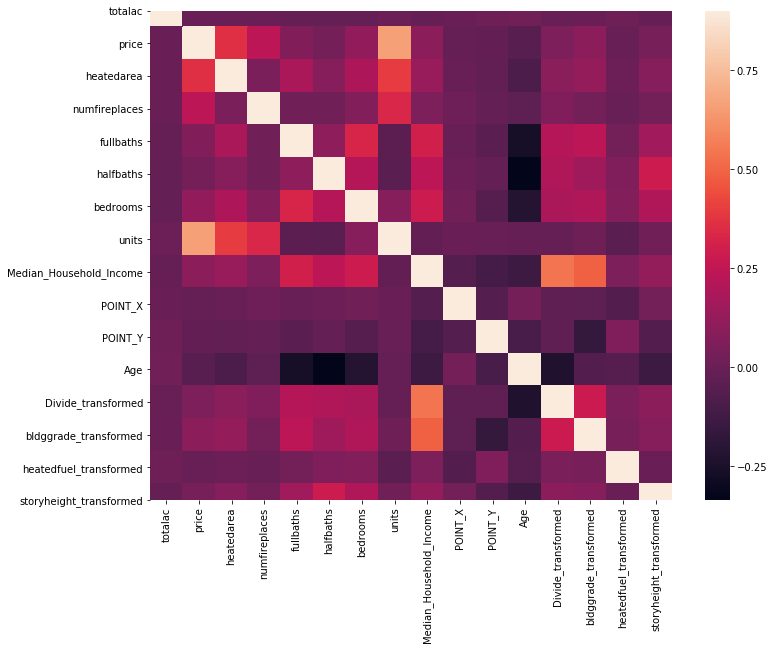

In [23]:
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True,fmt= '.2f',annot_kws={'size': 10})
plt.show();

In [24]:
housing.columns

Index(['totalac', 'dateofsale', 'price', 'heatedarea', 'storyheight',
       'heatedfuel', 'numfireplaces', 'bldggrade', 'fullbaths', 'halfbaths',
       'bedrooms', 'units', 'descpropertyuse', 'Median_Household_Income',
       'POINT_X', 'POINT_Y', 'Divide', 'Age', 'Divide_transformed',
       'bldggrade_transformed', 'heatedfuel_transformed',
       'storyheight_transformed'],
      dtype='object')

In [25]:
### Delete original columns for building grade, Divide, heatedfuel and storyheight
housing = housing.drop(columns = ['bldggrade', 'heatedfuel', "Divide",'descpropertyuse', 'storyheight'] )
housing.head() 

,totalac,dateofsale,price,heatedarea,numfireplaces,fullbaths,halfbaths,bedrooms,units,Median_Household_Income,POINT_X,POINT_Y,Age,Divide_transformed,bldggrade_transformed,heatedfuel_transformed,storyheight_transformed
7,0.0,2/28/2017 0:00:00,215000.0,1998.0,1.0,3.0,0.0,4.0,1.0,0.0,-80.9,35.0,26.0,1,0,2,10
13,0.3,2/4/2002 0:00:00,120000.0,1664.0,1.0,2.0,1.0,3.0,1.0,0.0,-80.9,35.1,33.0,1,0,1,2
14,0.2,8/1/2012 0:00:00,190000.0,2256.0,1.0,2.0,0.0,3.0,1.0,0.0,-81.0,35.1,8.0,0,0,2,0
18,4.4,5/17/2013 0:00:00,340000.0,2668.0,1.0,2.0,1.0,3.0,1.0,0.0,-81.0,35.1,17.0,1,4,1,0
20,0.2,7/31/2020 0:00:00,325000.0,2856.0,1.0,2.0,1.0,4.0,1.0,0.0,-81.0,35.1,7.0,0,0,2,2


In [26]:
housing.columns

Index(['totalac', 'dateofsale', 'price', 'heatedarea', 'numfireplaces',
       'fullbaths', 'halfbaths', 'bedrooms', 'units',
       'Median_Household_Income', 'POINT_X', 'POINT_Y', 'Age',
       'Divide_transformed', 'bldggrade_transformed', 'heatedfuel_transformed',
       'storyheight_transformed'],
      dtype='object')

In [27]:
housing = housing.loc[:, ('totalac', 'price', 'heatedarea', 'numfireplaces',
       'fullbaths', 'halfbaths', 'bedrooms', 'units',
       'Median_Household_Income', 'POINT_X', 'POINT_Y', 'Age', 'Divide_transformed',
       'bldggrade_transformed', 'heatedfuel_transformed')]. apply(np.int64)
housing.dtypes

totalac                    int64
price                      int64
heatedarea                 int64
numfireplaces              int64
fullbaths                  int64
halfbaths                  int64
bedrooms                   int64
units                      int64
Median_Household_Income    int64
POINT_X                    int64
POINT_Y                    int64
Age                        int64
Divide_transformed         int64
bldggrade_transformed      int64
heatedfuel_transformed     int64
dtype: object

In [28]:
housing.dtypes

totalac                    int64
price                      int64
heatedarea                 int64
numfireplaces              int64
fullbaths                  int64
halfbaths                  int64
bedrooms                   int64
units                      int64
Median_Household_Income    int64
POINT_X                    int64
POINT_Y                    int64
Age                        int64
Divide_transformed         int64
bldggrade_transformed      int64
heatedfuel_transformed     int64
dtype: object

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

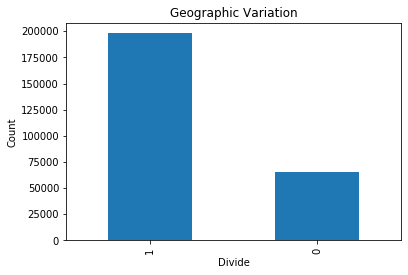

In [29]:
housing['Divide_transformed'].value_counts().plot(kind='bar')
plt.title('Geographic Variation')
plt.xlabel('Divide')
plt.ylabel('Count')
sns.despine

### Preprocessing 

#### Geographical Split

In [30]:
### Geographical split - Split geography into two areas using the code  
Crescent = housing[housing["Divide_transformed"] == 0] 
Wedge =  housing[housing["Divide_transformed"] == 1]  # how to sample from two groups. Stratified sampling 
Crescent.shape, Wedge.shape

((65719, 15), (197985, 15))

In [31]:
geosplit=housing["Divide_transformed"] 

In [32]:
housing.shape

(263704, 15)

In [33]:
housing.head(1)

,totalac,price,heatedarea,numfireplaces,fullbaths,halfbaths,bedrooms,units,Median_Household_Income,POINT_X,POINT_Y,Age,Divide_transformed,bldggrade_transformed,heatedfuel_transformed
7,0,215000,1998,1,3,0,4,1,0,-80,35,26,1,0,2


In [34]:
#housing_t= housing['price']
#housing_t=housing_t.values.reshape(-1,1)
#housing_x=housing.drop(['price'],axis=1)

In [35]:
#from sklearn.model_selection import train_test_split
#housing_train, housing_test, housingprice_train, housingprice_test = train_test_split(housing_x,housing_t, test_size=0.2, random_state=40,stratify=geosplit)

In [36]:
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=40,stratify=geosplit)

In [37]:
housing_train.shape

(210963, 15)

In [38]:
housing_test.shape

(52741, 15)

In [39]:
# ### Normalise 

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# X_train_scale = preprocessing.normalize(X_train)
# X_test_scale =  preprocessing.normalize(X_test)

# X_train_scale.shape, X_test_scale.shape

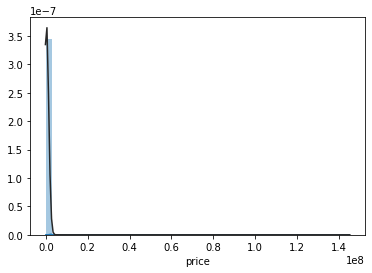

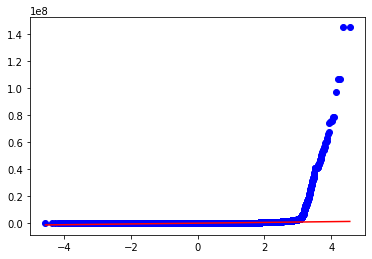

skewness: 60.446039
kurtosis: 5151.616807


In [40]:
# kernel density plot
sns.distplot(housing.price,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing['price']);
#QQ plot
fig = plt.figure()
res = stats.probplot(housing['price'], plot=plt)
plt.show()
print("skewness: %f" % housing['price'].skew())
print("kurtosis: %f" % housing['price'].kurt())

In [41]:
#Scale features 
'''
X_train=housing_train

scaler = RobustScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns]) #scale data
X_train
'''

'\nX_train=housing_train\n\nscaler = RobustScaler()\nX_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns]) #scale data\nX_train\n'

In [42]:
housing_test = housing_test[housing_test['price']!=0].drop('POINT_Y', axis=1)
housing_train = housing_train[housing_train['price']!=0].drop('POINT_Y',axis=1)

### Neural Network 

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()

In [44]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])                    # two hidden layers with 64 nodes 

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.1))
    return model


def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')


 
    plt.grid(True)

In [45]:
def neuralnetwork(train, test):
    
    train_dataset = train
    test_dataset = test
    
    train_features = train_dataset.copy()
    test_features = test_dataset.copy()
    
    train_labels = train_features.pop('price')
    test_labels = test_features.pop('price')
    
    
    normalizer = preprocessing.Normalization()
    normalizer.adapt(np.array(train_features))
    dnn_model = build_and_compile_model(normalizer)
    
    history = dnn_model.fit(
        train_features, train_labels,
      validation_split=0.2,
        verbose=1, epochs=10)   # here you can change epochs
    
    plot_loss(history)

Epoch 1/10
4384/4384 [==============================] - 3s 706us/step - loss: 102505.8750 - val_loss: 98485.5547
Epoch 2/10
4384/4384 [==============================] - 3s 633us/step - loss: 96822.2422 - val_loss: 98606.8203
Epoch 3/10
4384/4384 [==============================] - 3s 739us/step - loss: 95082.5859 - val_loss: 97352.7734
Epoch 4/10
4384/4384 [==============================] - 4s 874us/step - loss: 95229.2656 - val_loss: 96383.9453
Epoch 5/10
4384/4384 [==============================] - 4s 845us/step - loss: 94783.0547 - val_loss: 95430.3281
Epoch 6/10
4384/4384 [==============================] - 4s 888us/step - loss: 94737.5938 - val_loss: 93363.7266
Epoch 7/10
4384/4384 [==============================] - 4s 917us/step - loss: 94335.6406 - val_loss: 93697.9453
Epoch 8/10
4384/4384 [==============================] - 4s 1ms/step - loss: 93787.4766 - val_loss: 93424.1484
Epoch 9/10
4384/4384 [==============================] - 4s 999us/step - loss: 92840.9375 - val_loss: 9878

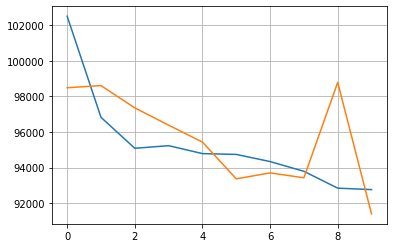

In [46]:
neuralnetwork(housing_train, housing_test)

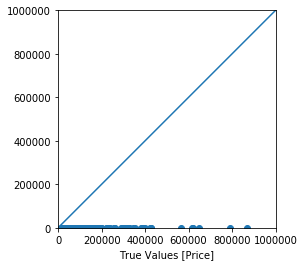

In [47]:
train_features = housing_train.copy()
test_features = housing_test.copy()

#Separate Features from labels
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

#housing_train, housing_test
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
dnn_model = build_and_compile_model(normalizer)


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels[:100], test_predictions[:100])
plt.xlabel('True Values [Price]')
#plt.ylabel('Predictions [Price]')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

SyntaxError: invalid syntax (<ipython-input-48-29e0c3615294>, line 1)

### Random forest classifiers for geosplit 

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



housing_t= housing['price']
housing_t=housing_t.values.reshape(-1,1)
housing_x=housing.drop(['price'],axis=1)

housing_train, housing_test, housingprice_train, housingprice_test = train_test_split(housing_x,housing_t, test_size=0.2, random_state=40,stratify=geosplit)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
his=model.fit(housing_train, housingprice_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [76]:
pred = model.predict(housing_test)


In [79]:
pred_train = model.predict(housing_train)

In [78]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error on test:', metrics.mean_absolute_error(housingprice_test, pred))  


Mean Absolute Error on test: 114556.95597450998


In [80]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error on train:', metrics.mean_absolute_error(housingprice_train, pred_train))  

Mean Absolute Error on train: 46551.9191632669


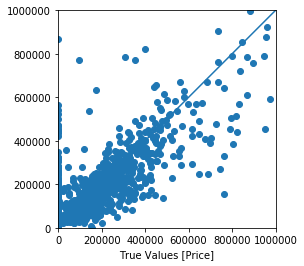

In [84]:
a = plt.axes(aspect='equal')
plt.scatter(housingprice_test[:1000], pred[:1000])
plt.xlabel('True Values [Price]')
#plt.ylabel('Predictions [Price]')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [1]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)
plot_loss(his)


NameError: name 'his' is not defined